In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("sip_base_SE.csv")
df['VAR_0431'] = df['VAR_0431'].replace({'CONE  II': 'CONE II'})


# To display the top 5 rows
df.head(5)

<ipython-input-66-4636c3807535>:1: DtypeWarning: Columns (13,32,72,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sip_base_SE.csv")


,ID_anonimo,VAR_0009,VAR_0012,VAR_0013,VAR_0015,VAR_0016,VAR_0036,VAR_0182,VAR_0183,VAR_0185,...,VAR_0258,VAR_0260,VAR_0266,VAR_0261,VAR_0267,VAR_0273,VAR_0274,VAR_0275,VAR_0430,VAR_0431
0,969167,4.0,1.0,C,B,0.0,0.0,A,09/2021,9.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
1,188942,4.0,1.0,C,B,0.0,0.0,A,02/2021,NaN,...,1.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
2,134058,3.0,1.0,C,B,0.0,0.0,A,11/2021,8.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
3,124022,3.0,0.0,B,B,0.0,0.0,A,11/2021,5.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
4,685285,4.0,1.0,C,B,0.0,0.0,A,10/2021,10.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II


In [ ]:
# Count plot for maternal age groups
plt.figure(figsize=(10, 6))
selected_values = ['VAR_0009']
ageDf = pd.DataFrame(df, columns=selected_values)
ageDf.head(5)

,VAR_0009
0,4
1,4
2,3
3,3
4,4


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='VAR_0009', ylabel='Count'>

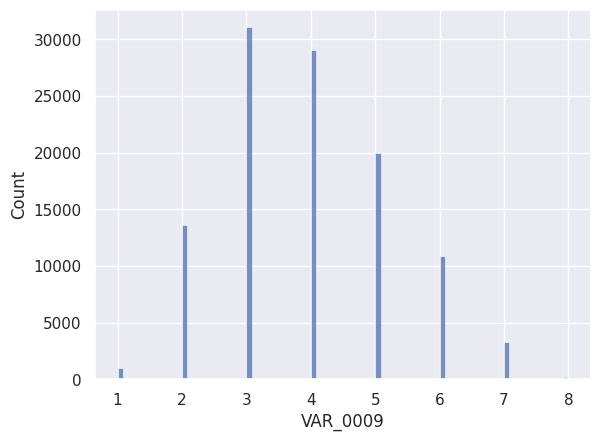

In [ ]:
sns.histplot(x=df['VAR_0009'])

(0.0, 20.0)

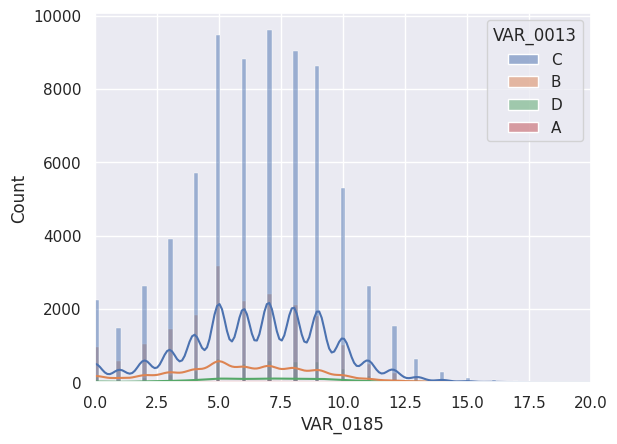

In [ ]:
# levelOfEducation = df['VAR_0013']
# consultaPreNatal = df['VAR_0185']

sns.histplot(data=df, x='VAR_0185', hue='VAR_0013', kde=TRUE)
plt.xlim(0,20)

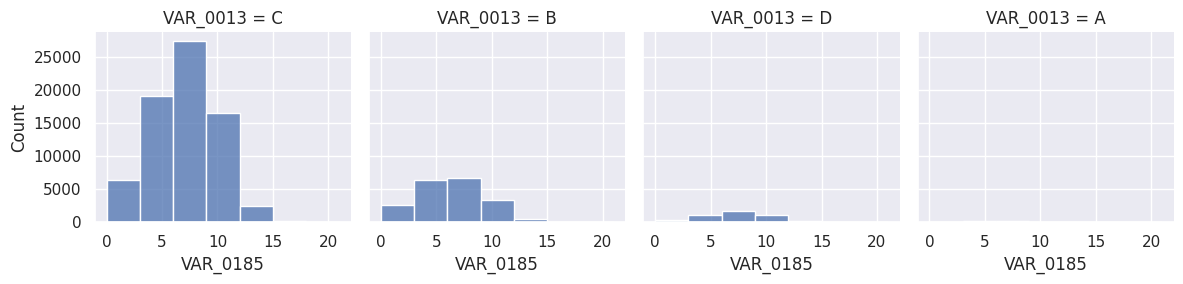

In [ ]:
sns.displot(
    df, x=df['VAR_0185'], col=df['VAR_0013'],
    binwidth=3, height=3,
)


In [ ]:
df['VAR_0013'].value_counts()

C    75957
B    20628
D     4660
A      563
Name: VAR_0013, dtype: int64

In [ ]:
df['VAR_0013'].isnull().sum()

12465

<Axes: xlabel='VAR_0013', ylabel='count'>

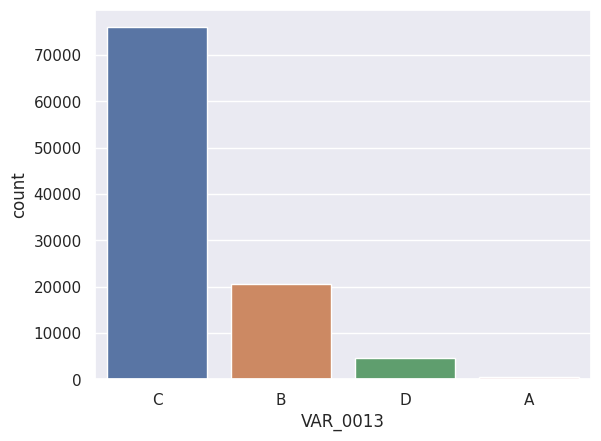

In [ ]:
sns.countplot(
    data=df, x='VAR_0013'
)

In [ ]:
#Episiotomía
df['VAR_0292'].value_counts()



0.0    175982
1.0     25664
Name: VAR_0292, dtype: int64

In [ ]:
df['VAR_0292'].count()

201646

In [ ]:
df['VAR_0431'].value_counts()

CONE III B    97925
CONE II       60053
CONE III A    47333
SIN CONE       5154
CONE  II        638
Name: VAR_0431, dtype: int64

<Axes: xlabel='VAR_0431', ylabel='count'>

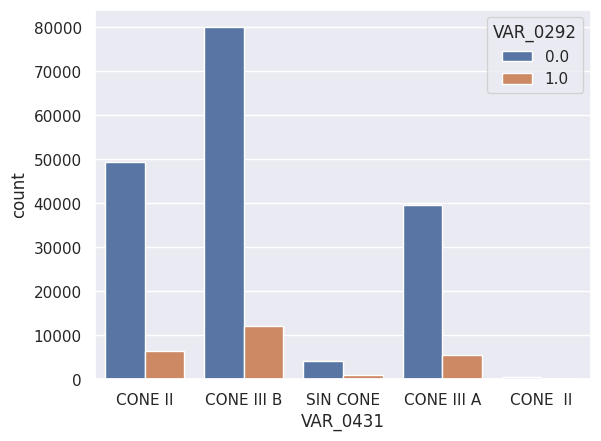

In [ ]:
#VAR_0431 cone
#VAR_0292 Episiotomía

sns.countplot(data=df, x="VAR_0431", hue="VAR_0292")

Episiotomía    0.0    1.0  total  percentage
CONE                                        
CONE II      50009   6577  56586    0.116230
CONE III A   39668   5495  45163    0.121670
CONE III B   80023  12201  92224    0.132297
SIN CONE      4067    925   4992    0.185296


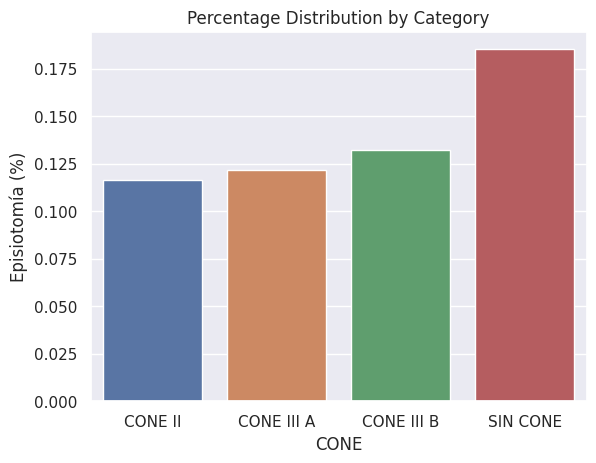

In [ ]:
#VAR_0431 cone
#VAR_0292 Episiotomía
df_episiotomia = subset = df.loc[:, ['VAR_0292', 'VAR_0431']]
df_episiotomia.rename(columns={"VAR_0431": "CONE", "VAR_0292": 'Episiotomía' }, inplace=True)

df_episiotomia= df_episiotomia.groupby(['Episiotomía', 'CONE']).size().reset_index().pivot(columns='Episiotomía', index='CONE', values=0)
df_episiotomia.head(5)

col0 = df_episiotomia[df_episiotomia.columns[0]].to_list()
col1 = df_episiotomia[df_episiotomia.columns[1]].to_list()
total = [c1+c2 for c1, c2 in zip(col0, col1)]

df_episiotomia['total'] = total
df_episiotomia['percentage'] = [c1 / c2 for c1, c2 in zip(col1, total)]

print(df_episiotomia)

sns.barplot(x=df_episiotomia.index , y='percentage', data=df_episiotomia)
plt.title('Percentage Distribution by Category')
plt.ylabel('Episiotomía (%)')
plt.show()

Tipo de parto  espontáneo  inducido  cesárea    total  espontáneo %  \
CONE                                                                  
CONE II           38333.0    4244.0  13928.0  56505.0      0.678400   
CONE III A        29851.0    3415.0  10038.0  43304.0      0.689336   
CONE III B        55161.0   10808.0  23794.0  89763.0      0.614518   
SIN CONE           3892.0     232.0    871.0   4995.0      0.779179   

Tipo de parto  inducido %  cesárea %  
CONE                                  
CONE II          0.075108   0.246491  
CONE III A       0.078861   0.231803  
CONE III B       0.120406   0.265076  
SIN CONE         0.046446   0.174374  


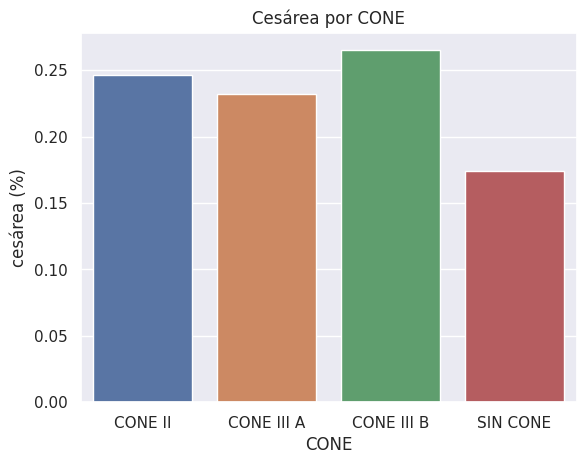

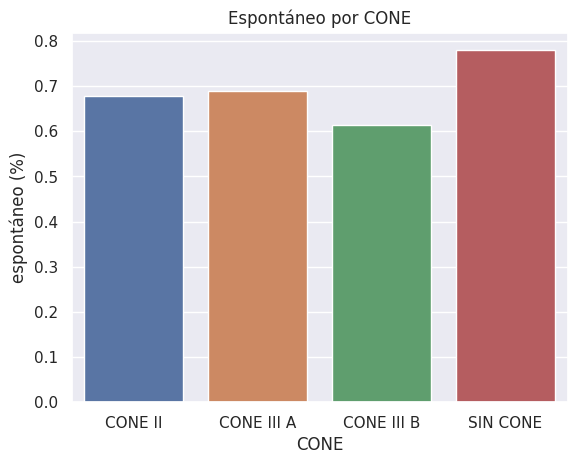

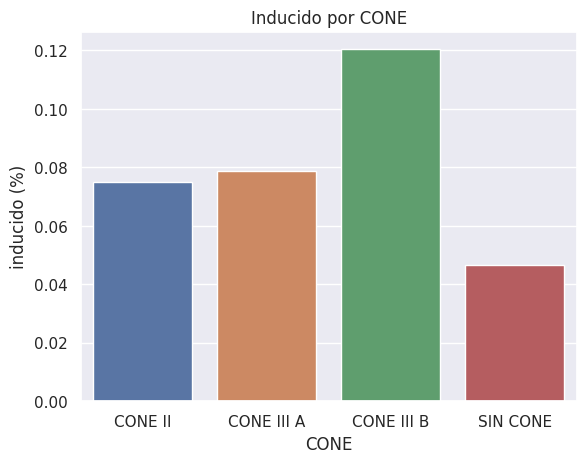

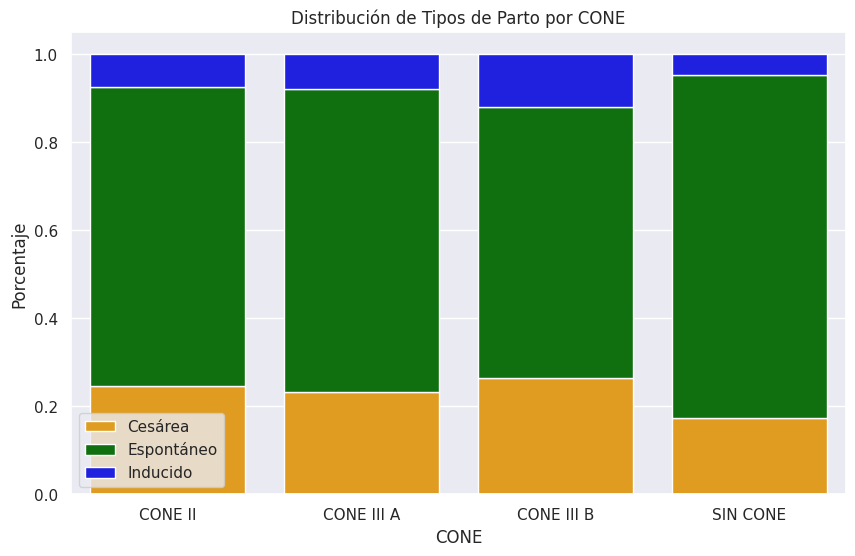

In [ ]:
df_tipo_parto = subset = df.loc[:, ['VAR_0190', 'VAR_0431']]
df_tipo_parto.rename(columns={"VAR_0431": "CONE", "VAR_0190": 'Tipo de parto' }, inplace=True)

df_tipo_parto = df_tipo_parto.groupby(['Tipo de parto', 'CONE']).size().reset_index().pivot(columns='Tipo de parto', index='CONE', values=0)

df_tipo_parto = df_tipo_parto.drop(columns=['0', 'X', '\\'], axis=1)

df_tipo_parto.rename(columns={ 'A': 'espontáneo','B': 'inducido','C': 'cesárea',}, inplace=True)

col0 = df_tipo_parto[df_tipo_parto.columns[0]].to_list()
col1 = df_tipo_parto[df_tipo_parto.columns[1]].to_list()
col2 = df_tipo_parto[df_tipo_parto.columns[2]].to_list()

total = [c1+  c2 + c3  for c1, c2, c3 in zip(col0, col1, col2)]

df_tipo_parto['total'] = total
df_tipo_parto['espontáneo %'] = [c1 / c2 for c1, c2 in zip(col0, total)]
df_tipo_parto['inducido %'] = [c1 / c2 for c1, c2 in zip(col1, total)]
df_tipo_parto['cesárea %'] = [c1 / c2 for c1, c2 in zip(col2, total)]

print(df_tipo_parto)

sns.barplot(x=df_tipo_parto.index , y='cesárea %', data=df_tipo_parto)
plt.title('Cesárea por CONE')
plt.ylabel('cesárea (%)')
plt.show()

sns.barplot(x=df_tipo_parto.index , y='espontáneo %', data=df_tipo_parto)
plt.title('Espontáneo por CONE')
plt.ylabel('espontáneo (%)')
plt.show()

sns.barplot(x=df_tipo_parto.index , y='inducido %', data=df_tipo_parto)
plt.title('Inducido por CONE')
plt.ylabel('inducido (%)')
plt.show()

# Stacked bar chart for 'Cesárea', 'Espontáneo', and 'Inducido'
plt.figure(figsize=(10, 6))

# Cesárea
sns.barplot(x=df_tipo_parto.index, y='cesárea %', data=df_tipo_parto, color='orange', label='Cesárea')

# Espontáneo
sns.barplot(x=df_tipo_parto.index, y='espontáneo %', data=df_tipo_parto, color='green', label='Espontáneo', bottom=df_tipo_parto['cesárea %'])

# Inducido
sns.barplot(x=df_tipo_parto.index, y='inducido %', data=df_tipo_parto, color='blue', label='Inducido', bottom=df_tipo_parto['cesárea %'] + df_tipo_parto['espontáneo %'])

plt.title('Distribución de Tipos de Parto por CONE')
plt.xlabel('CONE')
plt.ylabel('Porcentaje')
plt.legend()
plt.show()

Acompañante   pareja  familiar    otro  ninguno    total  pareja %  \
CONE                                                                 
CONE II      15429.0   11124.0  4518.0  22333.0  53404.0  0.288911   
CONE III A    7427.0    9028.0  7184.0  20331.0  43970.0  0.168911   
CONE III B   22856.0   12953.0  6810.0  41917.0  84536.0  0.270370   
SIN CONE       931.0    1149.0   159.0   1969.0   4208.0  0.221245   

Acompañante  familiar %    otro %  ninguno %  
CONE                                          
CONE II        0.208299  0.084600   0.084600  
CONE III A     0.205322  0.163384   0.163384  
CONE III B     0.153225  0.080557   0.080557  
SIN CONE       0.273051  0.037785   0.037785  


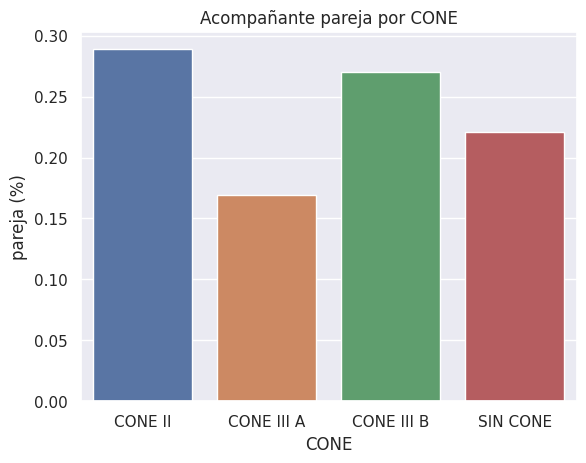

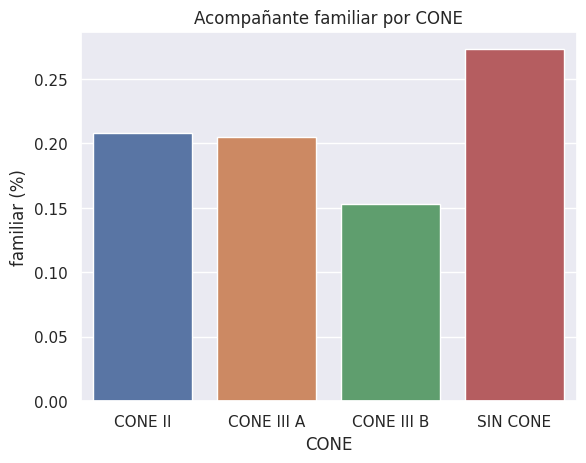

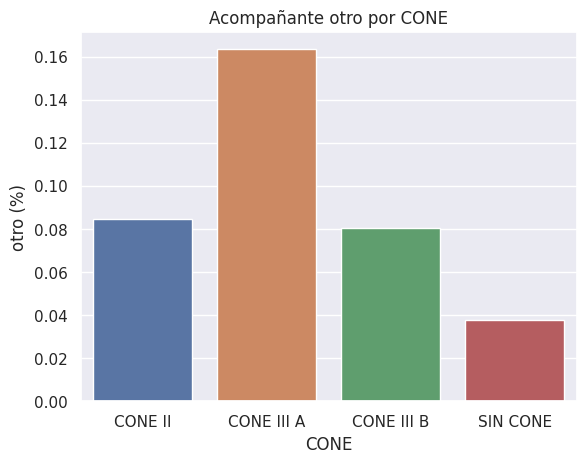

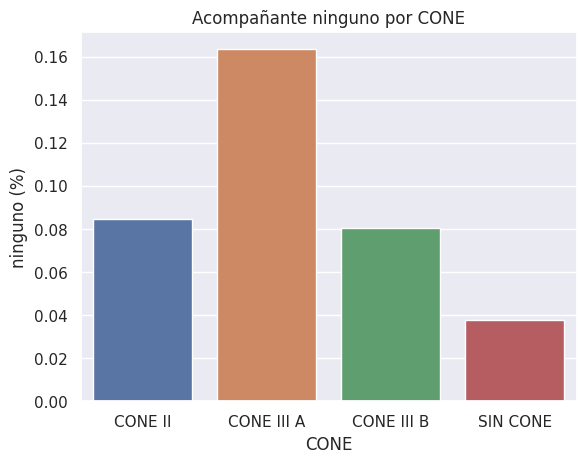

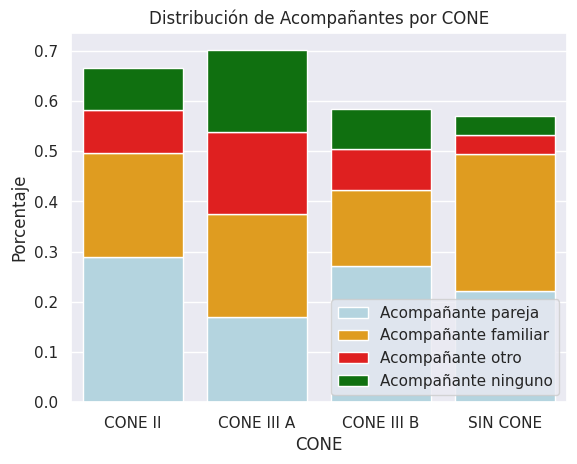

In [ ]:
df_compa = subset = df.loc[:, ['VAR_0204', 'VAR_0431']]
df_compa.rename(columns={"VAR_0431": "CONE", "VAR_0204": 'Acompañante' }, inplace=True)

df_compa = df_compa.groupby(['Acompañante', 'CONE']).size().reset_index().pivot(columns='Acompañante', index='CONE', values=0)
df_compa

df_compa = df_compa.drop(columns=['0', '\\'], axis=1)

df_compa.rename(columns={ 'A': 'pareja','B': 'familiar','C': 'otro', 'D': 'ninguno'}, inplace=True)

col0 = df_compa[df_compa.columns[0]].to_list()
col1 = df_compa[df_compa.columns[1]].to_list()
col2 = df_compa[df_compa.columns[2]].to_list()
col3 = df_compa[df_compa.columns[3]].to_list()

total = [c1+  c2 + c3 + c4 for c1, c2, c3, c4 in zip(col0, col1, col2, col3)]

df_compa['total'] = total
df_compa['pareja %'] = [c1 / c2 for c1, c2 in zip(col0, total)]
df_compa['familiar %'] = [c1 / c2 for c1, c2 in zip(col1, total)]
df_compa['otro %'] = [c1 / c2 for c1, c2 in zip(col2, total)]
df_compa['ninguno %'] = [c1 / c2 for c1, c2 in zip(col2, total)]

print(df_compa)

sns.barplot(x=df_tipo_parto.index , y='pareja %', data=df_compa)
plt.title('Acompañante pareja por CONE')
plt.ylabel('pareja (%)')
plt.show()

sns.barplot(x=df_tipo_parto.index , y='familiar %', data=df_compa)
plt.title('Acompañante familiar por CONE')
plt.ylabel('familiar (%)')
plt.show()

sns.barplot(x=df_tipo_parto.index , y='otro %', data=df_compa)
plt.title('Acompañante otro por CONE')
plt.ylabel('otro (%)')
plt.show()

sns.barplot(x=df_tipo_parto.index , y='ninguno %', data=df_compa)
plt.title('Acompañante ninguno por CONE')
plt.ylabel('ninguno (%)')
plt.show()


# Acompañante pareja
sns.barplot(x=df_compa.index, y='pareja %', data=df_compa, color='lightblue', label='Acompañante pareja')

# Acompañante familiar
sns.barplot(x=df_compa.index, y='familiar %', data=df_compa, color='orange', label='Acompañante familiar', bottom=df_compa['pareja %'])

# Acompañante otro
sns.barplot(x=df_compa.index, y='otro %', data=df_compa, color='red', label='Acompañante otro', bottom=df_compa['pareja %'] + df_compa['familiar %'])

# Acompañante ninguno
sns.barplot(x=df_compa.index, y='ninguno %', data=df_compa, color='green', label='Acompañante ninguno', bottom=df_compa['pareja %'] + df_compa['familiar %'] + df_compa['otro %'])

plt.title('Distribución de Acompañantes por CONE')
plt.xlabel('CONE')
plt.ylabel('Porcentaje')
plt.legend()
plt.show()

Tipo de parto  espontáneo  inducido  cesárea    total  espontáneo %  \
CONE                                                                  
CONE II           38333.0    4244.0  13928.0  56505.0      0.678400   
CONE III A        29851.0    3415.0  10038.0  43304.0      0.689336   
CONE III B        55161.0   10808.0  23794.0  89763.0      0.614518   
SIN CONE           3892.0     232.0    871.0   4995.0      0.779179   

Tipo de parto  inducido %  cesárea %  
CONE                                  
CONE II          0.075108   0.246491  
CONE III A       0.078861   0.231803  
CONE III B       0.120406   0.265076  
SIN CONE         0.046446   0.174374  


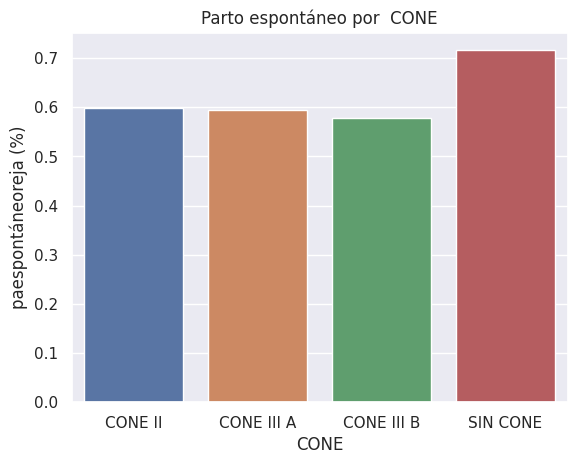

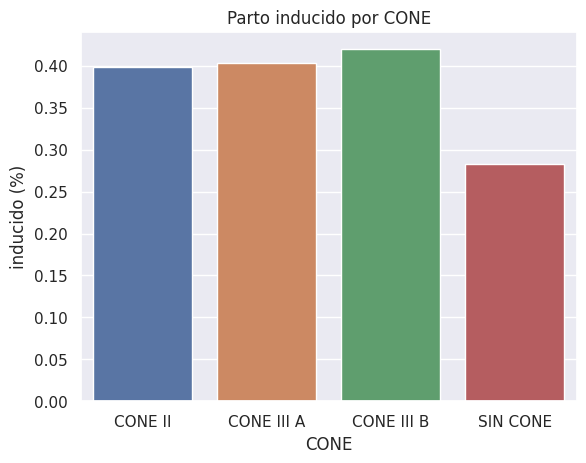

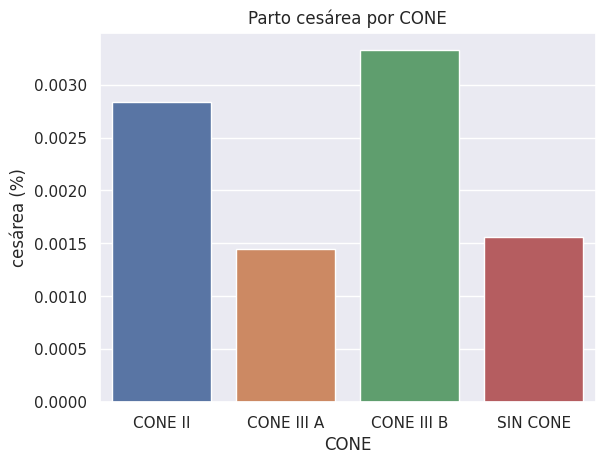

In [ ]:
df_terminacion = subset = df.loc[:, ['VAR_0287', 'VAR_0431']]
df_terminacion.rename(columns={"VAR_0431": "CONE", "VAR_0287": 'Terminación' }, inplace=True)

df_terminacion = df_terminacion.groupby(['Terminación', 'CONE']).size().reset_index().pivot(columns='Terminación', index='CONE', values=0)

df_terminacion = df_terminacion.drop(columns=['0', '1', 'E', 'P', '\\'], axis=1)
df_terminacion

df_terminacion.rename(columns={ 'A': 'vaginal espontánea','B': 'cesárea','C': 'fórceps', 'D': 'vacuum', 'E': 'otra'}, inplace=True)
df_terminacion

col0 = df_terminacion[df_terminacion.columns[0]].to_list()
col1 = df_terminacion[df_terminacion.columns[1]].to_list()
col2 = df_terminacion[df_terminacion.columns[2]].to_list()

total = [c1+  c2 + c3  for c1, c2, c3 in zip(col0, col1, col2 )]

df_terminacion['total'] = total

df_terminacion['vaginal %'] = [c1 / c2 for c1, c2 in zip(col0, total)]
df_terminacion['cesárea %'] = [c1 / c2 for c1, c2 in zip(col1, total)]
df_terminacion['vacuum %'] = [c1 / c2 for c1, c2 in zip(col2, total)]

print(df_tipo_parto)
sns.barplot(x=df_terminacion.index , y='vaginal %', data=df_terminacion)
plt.title('Parto espontáneo por  CONE')
plt.ylabel('paespontáneoreja (%)')
plt.show()

sns.barplot(x=df_terminacion.index , y='cesárea %', data=df_terminacion)
plt.title('Parto inducido por CONE')
plt.ylabel('inducido (%)')
plt.show()

sns.barplot(x=df_terminacion.index , y='vacuum %', data=df_terminacion)
plt.title('Parto cesárea por CONE')
plt.ylabel('cesárea (%)')
plt.show()


